<a href="https://colab.research.google.com/github/smitvashisht/Food-delivery-and-cost-profitability-analysis/blob/main/Food_Delivery_Cost_and_Profitability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_csv('/content/food_orders_new_delhi.csv')

In [50]:
df.head(15)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


In [52]:
from datetime import datetime

In [53]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])

In [54]:
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [55]:
def extract_discount(discount_str):
    try:
        if 'off' in discount_str:
            return int(discount_str.split(' ')[0])
        elif '%' in discount_str:
            return int(discount_str.split('%')[0])
        else:
            return 0.0
    except TypeError:  # Handle the case where discount_str is not a string
        return 0.0

df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [56]:
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                if x['Discount Percentage'] > 1
                                                  else x['Discount Percentage'], axis=1)

In [57]:
df['Discount Amount'] = df.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                 else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(df[['Order Value' , 'Discounts and Offers' , 'Discount Percentage', 'Discount Amount']].head(), df.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [58]:
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']


TOTAL_ORDERS = df.shape[0]
TOTAL_COSTS = df['Total Costs'].sum()
TOTAL_REVENUE = df['Revenue'].sum()
TOTAL_PROFIT = df['Profit'].sum()

In [59]:
print("Total Orders:", TOTAL_ORDERS)
print("Total Costs:", TOTAL_COSTS)
print("Total Revenue:", TOTAL_REVENUE)
print("Total Profit:", TOTAL_PROFIT)

Total Orders: 1000
Total Costs: 232709.85
Total Revenue: 126990
Total Profit: -105719.85


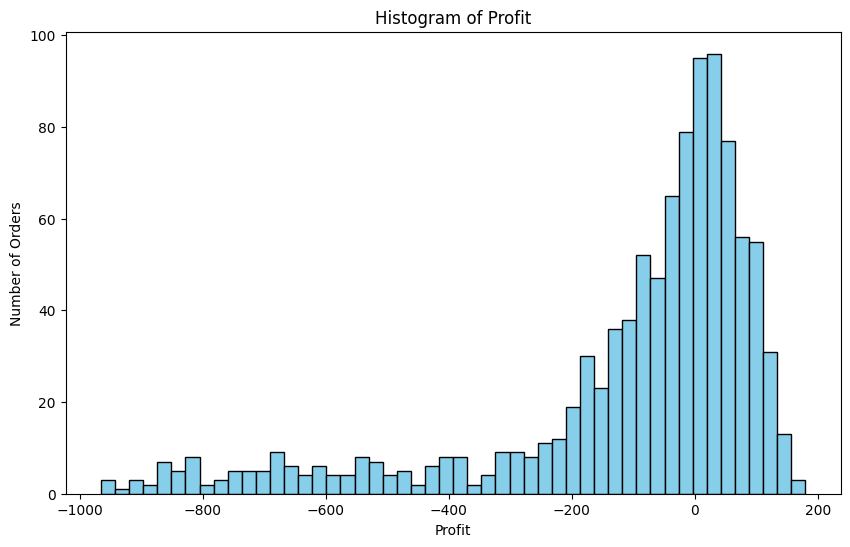

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.title('Histogram of Profit')
plt.show()

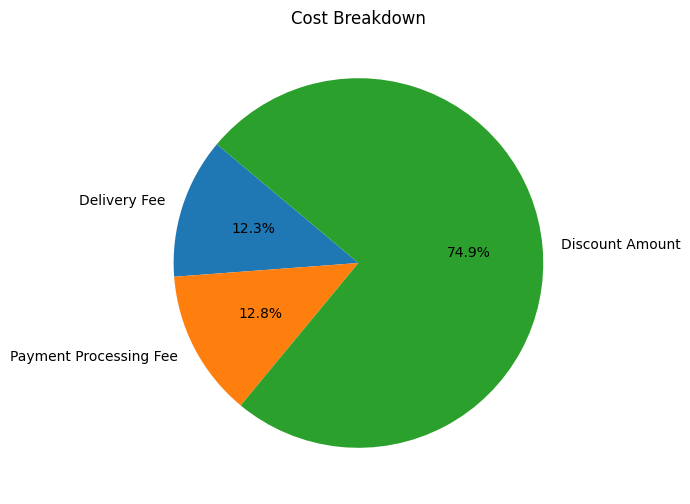

In [61]:
cost_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(10, 6))
plt.pie(cost_breakdown, labels=cost_breakdown.index, autopct='%1.1f%%', startangle=140)
plt.title('Cost Breakdown')
plt.show()

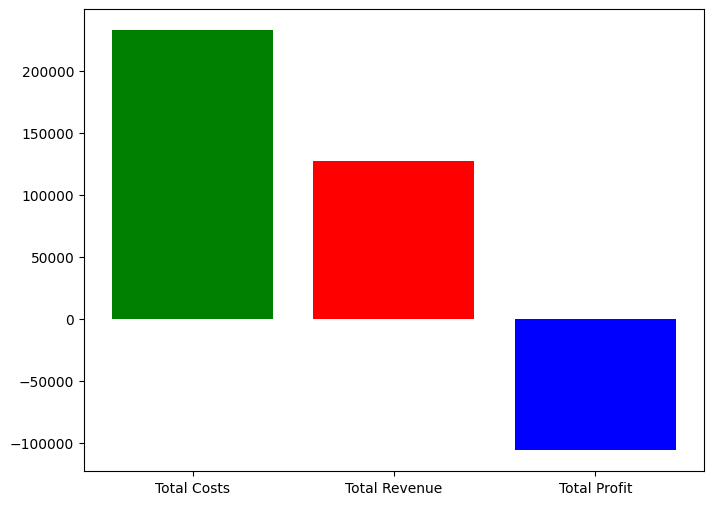

In [62]:
totals = ['Total Costs', 'Total Revenue', 'Total Profit']
values = [TOTAL_COSTS, TOTAL_REVENUE, TOTAL_PROFIT]

plt.figure(figsize=(8,6))
plt.bar(totals, values, color=['green','red','blue'])
# plt.xlabel('Totals')
# plt.ylabel('Value')
# plt.title('Totals')
plt.show()

In [64]:
profitable_orders = df[df['Profit'] > 0]


# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


<ipython-input-64-d15a5c4947dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
<ipython-input-64-d15a5c4947dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


In [65]:
recommended_commision_percentage = 30.0
recommended_discount_percentage = 6

df['Simulated Commision Fee'] = df['Order Value'] * recommended_commision_percentage / 100
df['Simulated Discount Amount'] = df['Order Value'] * recommended_discount_percentage / 100

df['Simulated Total Cost'] = (df['Simulated Commision Fee'] + df['Simulated Discount Amount'])
df['Simulated Profit'] = df['Simulated Commision Fee'] - df['Simulated Total Cost']

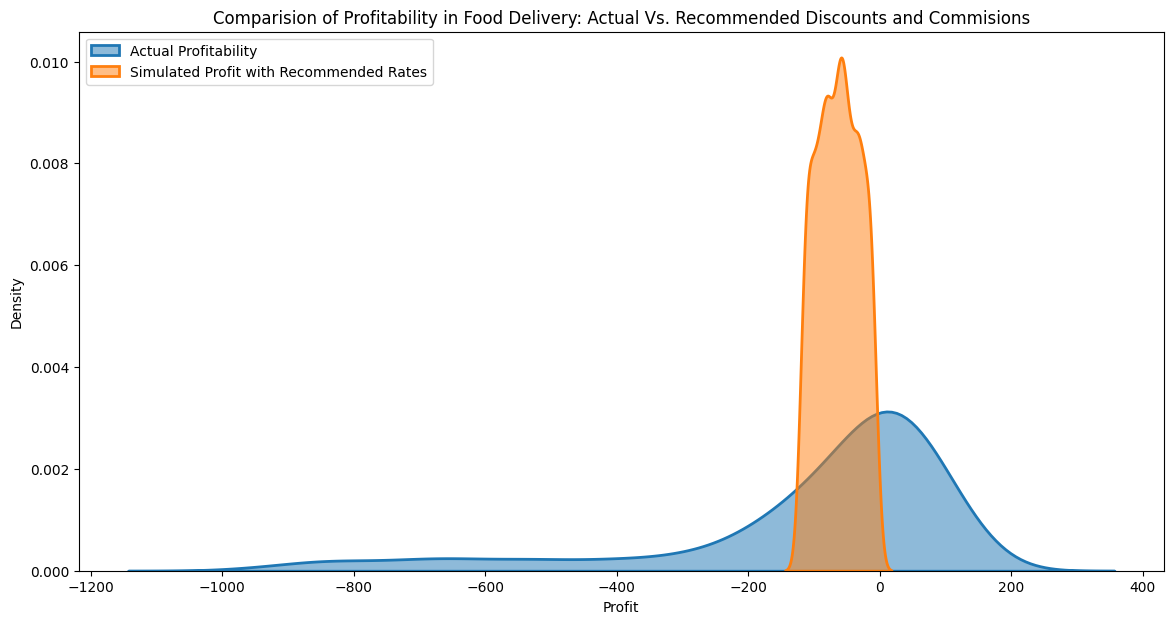

In [69]:
import seaborn as sns
plt.figure(figsize=(14,7))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill= True, alpha=0.5, linewidth=2)

# simulated profitablity
sns.kdeplot(df['Simulated Profit'], label='Simulated Profit with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparision of Profitability in Food Delivery: Actual Vs. Recommended Discounts and Commisions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()